# Supervised Learning: Linear Classifiers

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Datasets

In [2]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
data = load_breast_cancer()
X_cancer= data.data
y_cancer= data.target

target_names= data.target_names
print(target_names)

print(X_cancer.shape)
print(y_cancer.shape)


['malignant' 'benign']
(569, 30)
(569,)


In [7]:
y_new = pd.Series(y_cancer)
type(y_new)

pandas.core.series.Series

In [8]:
y_new.value_counts()

1    357
0    212
dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

## Linear models for classification

### Logistic regression

#### Logistic regression for binary classification on cancer dataset

In [4]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


### Support Vector Machines

#### Linear Support Vector Machine

### Application of SVMs unnormalized data

In [9]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


### Application of SVMs to normalized data with feature preprocessing using minmax scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.98
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.96


### Application of K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

example_patient = [[1.361e+01, 2.498e+01, 8.805e+01, 5.827e+02, 9.488e-02, 8.511e-02,
       8.625e-02, 4.489e-02, 1.609e-01, 5.871e-02, 4.565e-01, 1.290e+00,
       2.861e+00, 4.314e+01, 5.872e-03, 1.488e-02, 2.647e-02, 9.921e-03,
       1.465e-02, 2.355e-03, 1.699e+01, 3.527e+01, 1.086e+02, 9.065e+02,
       1.265e-01, 1.943e-01, 3.169e-01, 1.184e-01, 2.651e-01, 7.397e-02]]
print('Predicted status for the example patient is ', 
      target_names[knn.predict(example_patient)[0]-1])

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.94
Predicted status for the example patient is  benign


### Application of K-Nearest Neighbors to normalized data with feature preprocessing

In [11]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_patient = [[1.361e+01, 2.498e+01, 8.805e+01, 5.827e+02, 9.488e-02, 8.511e-02,
       8.625e-02, 4.489e-02, 1.609e-01, 5.871e-02, 4.565e-01, 1.290e+00,
       2.861e+00, 4.314e+01, 5.872e-03, 1.488e-02, 2.647e-02, 9.921e-03,
       1.465e-02, 2.355e-03, 1.699e+01, 3.527e+01, 1.086e+02, 9.065e+02,
       1.265e-01, 1.943e-01, 3.169e-01, 1.184e-01, 2.651e-01, 7.397e-02]]
print('Predicted status for the example patient is ', 
      target_names[knn.predict(example_patient)[0]-1])

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.96
Predicted status for the example patient is  benign


## Cross-validation

### Example based on k-NN classifier 

In [12]:
from sklearn.model_selection import cross_val_score
clf= KNeighborsClassifier(n_neighbors = 5)
cv_scores = cross_val_score(clf, X_cancer, y_cancer)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.9        0.94736842 0.92063492]
Mean cross-validation score (3-fold): 0.923


## Validation curve example

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = range(1,10,2)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_cancer, y_cancer,
                                            param_name='n_neighbors',
                                            param_range=param_range, cv=3)

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X_cancer, y_cancer,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [15]:
print(train_scores)

[[0.9762533  0.97361478 0.98421053]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]]


In [32]:
print(test_scores)

[[0.91578947 0.93684211 0.91005291]
 [0.62631579 0.62631579 0.62962963]
 [0.62631579 0.62631579 0.62962963]
 [0.62631579 0.62631579 0.62962963]]


<IPython.core.display.Javascript object>


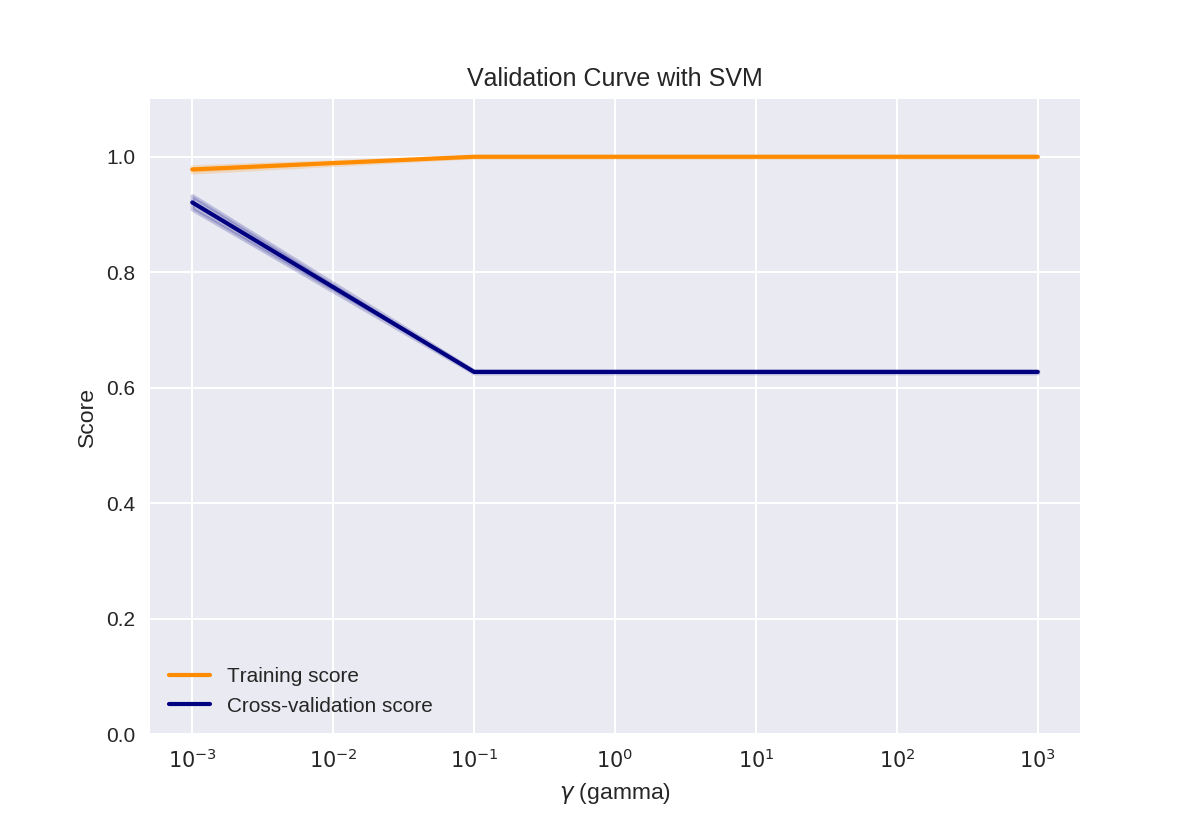

In [33]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Decision Trees

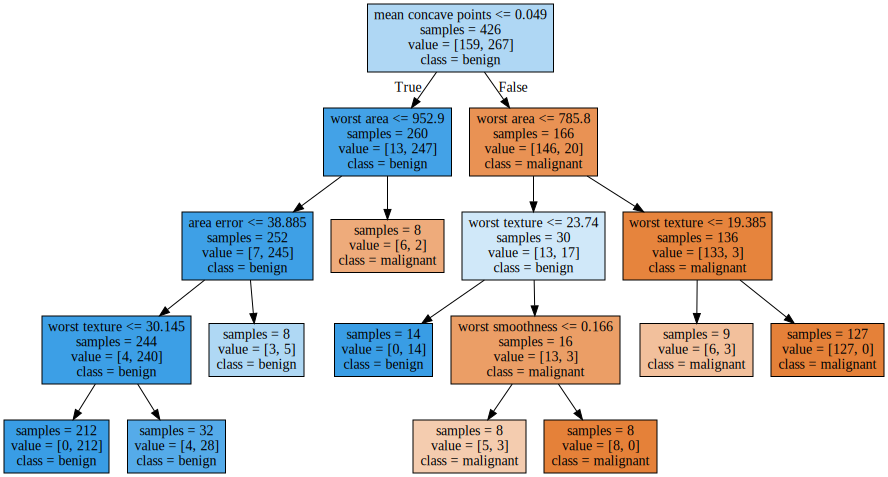

In [18]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, data.feature_names, data.target_names)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


<IPython.core.display.Javascript object>


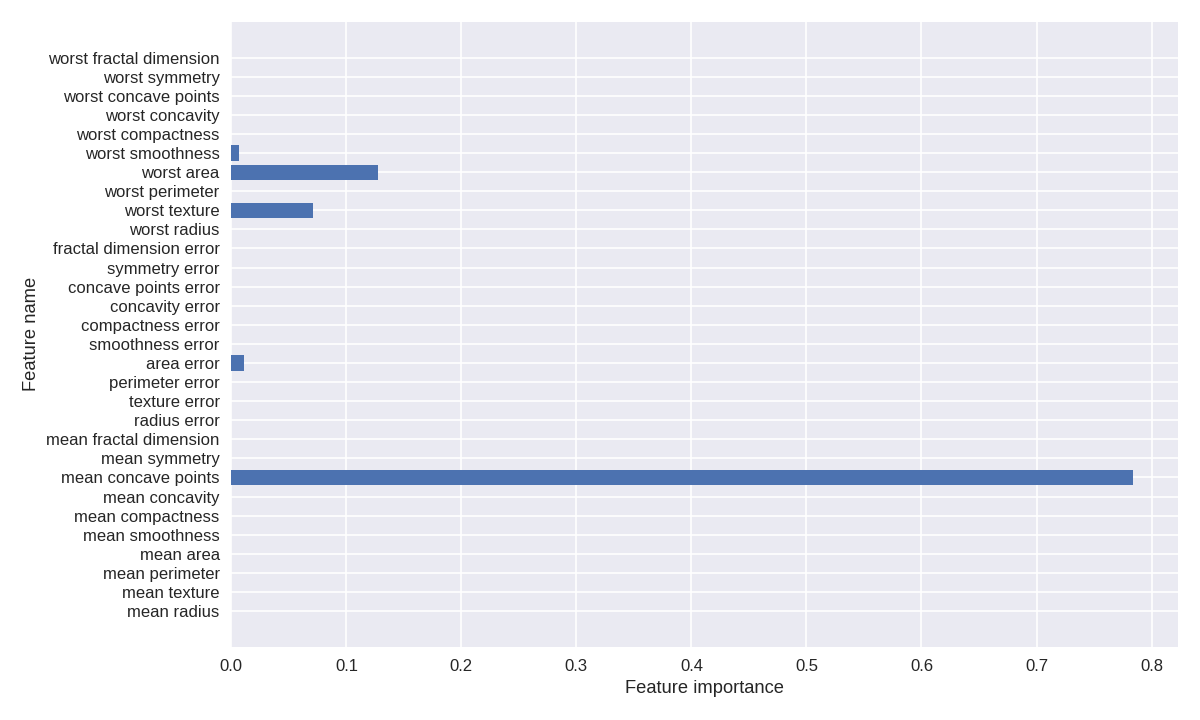

In [19]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, data.feature_names)
plt.tight_layout()

plt.show()